In [40]:
import csv
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats.mstats import zscore
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from pylab import *
import fits
import copy
import numbers
roi_df = pd.read_csv("C:/Users/chris/Desktop/projects/optometry/jupyter/opt.csv")

getBimodalExpected was called.
Expected values: 
(287.982865, 20, 1600.0, 3597.947805, 30, 227.0)
Least Squares Sum: 29688.228209034045
             params      sigma
mu1      315.492983   1.172215
sigma1    52.202482   1.298449
A1      1823.897681  37.350458
mu2     3893.828414  33.890067
sigma2  1489.606011  34.422399
A2       212.877325   4.198295


array([ 315.4929834 ,   52.20248187, 1823.89768051, 3893.82841372,
       1489.60601133,  212.87732515])

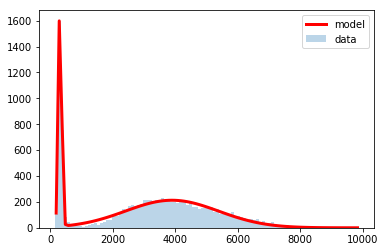

In [41]:
p = fits.bimodalGraph("DAPI", roi_df)
p

In [42]:
def determineThresholds(col, table, cutoff=0.01): #change bins?
    '''Determines the thresholds for the column of the table with the given cutoff.
    Returns the left x and right x that at the cutoff value. For example, with a cutoff of
    0.01, this fn will return the left x and right x that keeps 1% of the mass on the left
    and 1% of the mass on the right, respectively.'''
    assert(cutoff > 0 and cutoff < 1)
    nparr = np.asarray(table[col].tolist())
    y,x,_=hist(nparr,1000,alpha=.3,label='data')
    x=(x[1:]+x[:-1])/2
    sum = 0
    for ycord in y:
        sum += ycord
    left = sum * cutoff
    right = sum * (1 - cutoff)
    sum = 0
    leftx = 0
    rightx = 0
    for xcord, ycord in zip(x,y):
        sum += ycord
        if (left < sum and leftx == 0):
            leftx = xcord
        if (right < sum and rightx == 0):
            rightx = xcord
            break
    return leftx, rightx

(234.43931450000002, 7584.5085195)

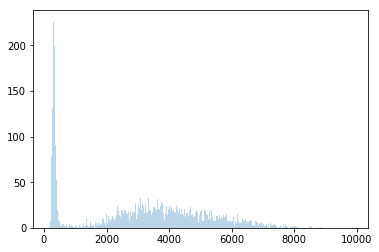

In [43]:
determineThresholds("DAPI", roi_df)

In [44]:
def normalize(col, table, cutoff=0.01):
    '''Determines thresholds using the determineThresholds fn. For all numbers
    greater than 1, they are made 1. For all numbers less than 0, they are made 0.
    A new col named normalized + colname is created in the table.'''
    leftx, rightx = determineThresholds(col, table, cutoff=0.01)
    def new(signal):
        normsignal = (signal - leftx) / (rightx - leftx)
        if (normsignal > 1):
            return 1
        elif (normsignal < 0):
            return 0
        else:
            return normsignal
    return table[col].apply(new)

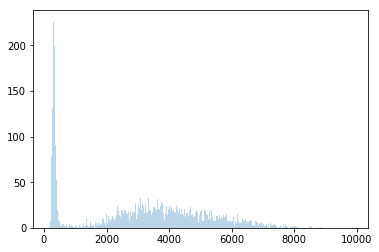

In [45]:
roi_df["norm DAPI"] = normalize("DAPI", roi_df)

In [46]:
dapi_rm_roi_df = roi_df[roi_df['norm DAPI'] > 0.2]

Passed  Unnamed: 0
Passed  ind cell
Passed  total index
Normalizing   TARPg3
Normalizing   Islet1
Normalizing   Pax6
Normalizing   DAPI
Normalizing   CD15
Normalizing   GLT-1
Normalizing   Cav3.1
Normalizing   DAPI.1
Normalizing   CABP5
Normalizing   SCGN
Normalizing   Kv2.2
Normalizing   DAPI.2
Normalizing   CAVIII
Normalizing   Rec
Normalizing   DAPI.3
Normalizing   Calb
Normalizing   PKC
Normalizing   Parv
Normalizing   DAPI.4
Passed  norm DAPI


,Unnamed: 0,ind cell,total index,TARPg3,Islet1,Pax6,DAPI,CD15,GLT-1,Cav3.1,...,norm SCGN,norm Kv2.2,norm DAPI.2,norm CAVIII,norm Rec,norm DAPI.3,norm Calb,norm PKC,norm Parv,norm DAPI.4
2,NaN,21_s1m1_cell 2,cell 2,453.132,1118.557,389.423,2316.406,1024.207,721.093,1008.160,...,0.316144,0.472079,0.169057,0.220058,0.332291,0.000000,0.000000,0.007463,0.014112,0.351869
3,NaN,21_s1m1_cell 3,cell 3,565.603,1665.260,1170.452,4304.305,1162.536,831.560,1058.113,...,0.020134,0.397662,0.332758,0.130357,0.104712,0.036096,0.007439,0.003529,0.000000,0.788997
5,NaN,21_s1m1_cell 5,cell 5,489.498,1895.483,526.208,3884.522,1131.230,836.739,1014.064,...,0.065533,0.409585,0.217424,0.245419,0.504197,0.007127,0.010478,0.015886,0.000199,0.595127
6,NaN,21_s1m1_cell 6,cell 6,555.135,1069.362,420.988,2019.306,1087.467,721.672,876.248,...,0.100124,0.381018,0.152263,0.222132,0.368373,0.000000,0.009886,0.040197,0.037502,0.284516
7,NaN,21_s1m1_cell 7,cell 7,412.604,2604.476,542.122,3174.623,1047.102,744.626,903.238,...,0.027948,0.302825,0.195907,0.239821,0.657378,0.003247,0.073082,0.058366,0.035891,0.513466
8,NaN,21_s1m1_cell 8,cell 8,674.315,1547.361,572.972,1768.599,1160.208,793.278,1037.414,...,0.033562,0.337521,0.100646,0.258427,0.486208,0.000000,0.055237,0.141541,0.149566,0.189589
9,NaN,21_s1m1_cell 9,cell 9,503.689,2437.244,904.448,2906.748,1054.896,714.839,896.123,...,0.016519,0.310234,0.189746,0.212802,0.335509,0.008949,0.212334,0.079421,0.088647,0.482549
11,NaN,21_s1m1_cell 11,cell 11,455.525,2302.930,2254.279,3280.239,1088.712,739.788,942.314,...,0.012430,0.425203,0.268861,0.114428,0.080056,0.034650,0.000000,0.000000,0.000000,0.501794
14,NaN,21_s1m1_cell 14,cell 14,632.461,2545.598,1781.568,5091.065,1154.271,834.190,1000.138,...,0.020940,0.383096,0.269716,0.176368,0.209321,0.037253,0.008451,0.005819,0.000000,0.601565
15,NaN,21_s1m1_cell 15,cell 15,426.542,2807.967,677.442,2957.409,1051.836,735.408,959.597,...,0.032389,0.326763,0.178951,0.396901,0.198994,0.021077,0.005786,0.043234,0.000000,0.478925


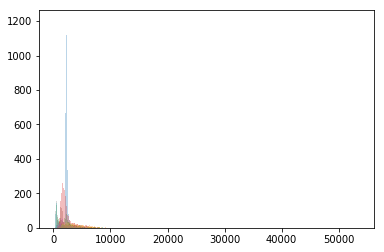

In [48]:
#Mean STD (3/18/19)
rm_roi_df = dapi_rm_roi_df.copy()
unwantedCols = []
cols = list(dapi_rm_roi_df)
selectedCols = [c for c in cols if c not in unwantedCols]
#for col in list(dapi_rm_roi_df):
for col in selectedCols:
    #if col.startswith("norm") or (dapi_rm_roi_df[col]).isna().any() or type(list(dapi_rm_roi_df[col])[0]) != float:
    if col.startswith("norm") or (dapi_rm_roi_df[col]).isna().any() or not isinstance(list(dapi_rm_roi_df[col])[0], numbers.Real):
        print("Passed ", col)
        continue
    print("Normalizing  ", col)
    rm_roi_df["norm " + col] = normalize(col, dapi_rm_roi_df)
rm_roi_df

In [20]:
numeric_cols = rm_roi_df.select_dtypes(include=[np.number]).columns
numeric_cols = [c for c in numeric_cols if c.startswith("norm")]
z_roi_df = rm_roi_df[numeric_cols].apply(zscore).add_prefix('z ')

In [21]:
z_roi_df

,z norm DAPI,z norm TARPg3,z norm Islet1,z norm Pax6,z norm CD15,z norm GLT-1,z norm Cav3.1,z norm DAPI.1,z norm CABP5,z norm SCGN,z norm Kv2.2,z norm DAPI.2,z norm CAVIII,z norm Rec,z norm DAPI.3,z norm Calb,z norm PKC,z norm Parv,z norm DAPI.4
2,-1.363378,-1.627591,-1.557428,-0.922059,-1.628151,-2.476671,-1.316044,-1.243301,-0.960918,1.353590,1.122038,-0.733558,-0.386049,0.486359,-1.415272,-1.421491,-1.156469,-0.550089,0.348386
3,0.087205,-1.310701,-1.342195,-0.543176,-1.628151,-2.436432,-1.069515,0.365505,-0.690609,-0.535480,0.690837,-0.140856,-0.827367,-0.763957,-1.268351,-1.378206,-1.176588,-0.626533,2.327956
5,-0.219113,-1.525129,-1.196502,-0.862022,-1.628151,-2.413025,-1.286907,-0.700690,-0.303839,-0.245754,0.759925,-0.558436,-0.261277,1.430812,-1.386264,-1.360520,-1.113398,-0.625452,1.450000
6,-1.580174,-1.340195,-1.557428,-0.914097,-1.628151,-2.476671,-1.573433,-1.478075,-0.976878,-0.025001,0.594396,-0.794364,-0.375845,0.684591,-1.415272,-1.363968,-0.989071,-0.423387,0.043374
7,-0.737131,-1.741781,-0.747828,-0.854146,-1.628151,-2.476671,-1.573433,-1.055746,-0.465822,-0.485609,0.141320,-0.636343,-0.288820,2.272386,-1.402054,-0.996240,-0.896155,-0.432109,1.080193
8,-1.704959,-1.004401,-1.416805,-0.838877,-1.628151,-2.476671,-1.171669,-1.791645,-0.301544,-0.449780,0.342356,-0.981248,-0.197283,1.331976,-1.415272,-1.100077,-0.470797,0.183666,-0.386511
9,-0.932601,-1.485145,-0.853658,-0.674825,-1.628151,-2.476671,-1.573433,-1.307882,-0.914366,-0.558547,0.184249,-0.658652,-0.421750,0.504040,-1.378848,-0.185959,-0.788479,-0.146333,0.940181
11,-0.660063,-1.620849,-0.938657,-0.006774,-1.628151,-2.476671,-1.573433,-0.336083,-0.987121,-0.584641,0.850418,-0.372204,-0.905738,-0.899419,-1.274240,-1.421491,-1.194636,-0.626533,1.027335
14,0.661309,-1.122326,-0.785088,-0.240726,-1.628151,-2.424545,-1.355634,-0.182597,-0.751948,-0.530334,0.606437,-0.369106,-0.601003,-0.189235,-1.263645,-1.372317,-1.164880,-0.626533,1.479154
15,-0.895634,-1.702510,-0.619052,-0.787174,-1.628151,-2.476671,-1.555713,-1.351449,-0.469769,-0.457271,0.280026,-0.697735,0.483991,-0.245977,-1.329482,-1.387823,-0.973540,-0.626533,0.923772


In [22]:
rm_roi_df = pd.concat([rm_roi_df, z_roi_df], axis=1, sort=False)

In [23]:
list(rm_roi_df)

['Unnamed: 0',
 'ind cell',
 'total index',
 'TARPg3',
 'Islet1',
 'Pax6',
 'DAPI',
 'CD15',
 'GLT-1',
 'Cav3.1',
 'DAPI.1',
 'CABP5',
 'SCGN',
 'Kv2.2',
 'DAPI.2',
 'CAVIII',
 'Rec',
 'DAPI.3',
 'Calb',
 'PKC',
 'Parv',
 'DAPI.4',
 'norm DAPI',
 'norm TARPg3',
 'norm Islet1',
 'norm Pax6',
 'norm CD15',
 'norm GLT-1',
 'norm Cav3.1',
 'norm DAPI.1',
 'norm CABP5',
 'norm SCGN',
 'norm Kv2.2',
 'norm DAPI.2',
 'norm CAVIII',
 'norm Rec',
 'norm DAPI.3',
 'norm Calb',
 'norm PKC',
 'norm Parv',
 'norm DAPI.4',
 'z norm DAPI',
 'z norm TARPg3',
 'z norm Islet1',
 'z norm Pax6',
 'z norm CD15',
 'z norm GLT-1',
 'z norm Cav3.1',
 'z norm DAPI.1',
 'z norm CABP5',
 'z norm SCGN',
 'z norm Kv2.2',
 'z norm DAPI.2',
 'z norm CAVIII',
 'z norm Rec',
 'z norm DAPI.3',
 'z norm Calb',
 'z norm PKC',
 'z norm Parv',
 'z norm DAPI.4']

In [24]:
rm_roi_df

,Unnamed: 0,ind cell,total index,TARPg3,Islet1,Pax6,DAPI,CD15,GLT-1,Cav3.1,...,z norm SCGN,z norm Kv2.2,z norm DAPI.2,z norm CAVIII,z norm Rec,z norm DAPI.3,z norm Calb,z norm PKC,z norm Parv,z norm DAPI.4
2,NaN,21_s1m1_cell 2,cell 2,453.132,1118.557,389.423,2316.406,1024.207,721.093,1008.160,...,1.353590,1.122038,-0.733558,-0.386049,0.486359,-1.415272,-1.421491,-1.156469,-0.550089,0.348386
3,NaN,21_s1m1_cell 3,cell 3,565.603,1665.260,1170.452,4304.305,1162.536,831.560,1058.113,...,-0.535480,0.690837,-0.140856,-0.827367,-0.763957,-1.268351,-1.378206,-1.176588,-0.626533,2.327956
5,NaN,21_s1m1_cell 5,cell 5,489.498,1895.483,526.208,3884.522,1131.230,836.739,1014.064,...,-0.245754,0.759925,-0.558436,-0.261277,1.430812,-1.386264,-1.360520,-1.113398,-0.625452,1.450000
6,NaN,21_s1m1_cell 6,cell 6,555.135,1069.362,420.988,2019.306,1087.467,721.672,876.248,...,-0.025001,0.594396,-0.794364,-0.375845,0.684591,-1.415272,-1.363968,-0.989071,-0.423387,0.043374
7,NaN,21_s1m1_cell 7,cell 7,412.604,2604.476,542.122,3174.623,1047.102,744.626,903.238,...,-0.485609,0.141320,-0.636343,-0.288820,2.272386,-1.402054,-0.996240,-0.896155,-0.432109,1.080193
8,NaN,21_s1m1_cell 8,cell 8,674.315,1547.361,572.972,1768.599,1160.208,793.278,1037.414,...,-0.449780,0.342356,-0.981248,-0.197283,1.331976,-1.415272,-1.100077,-0.470797,0.183666,-0.386511
9,NaN,21_s1m1_cell 9,cell 9,503.689,2437.244,904.448,2906.748,1054.896,714.839,896.123,...,-0.558547,0.184249,-0.658652,-0.421750,0.504040,-1.378848,-0.185959,-0.788479,-0.146333,0.940181
11,NaN,21_s1m1_cell 11,cell 11,455.525,2302.930,2254.279,3280.239,1088.712,739.788,942.314,...,-0.584641,0.850418,-0.372204,-0.905738,-0.899419,-1.274240,-1.421491,-1.194636,-0.626533,1.027335
14,NaN,21_s1m1_cell 14,cell 14,632.461,2545.598,1781.568,5091.065,1154.271,834.190,1000.138,...,-0.530334,0.606437,-0.369106,-0.601003,-0.189235,-1.263645,-1.372317,-1.164880,-0.626533,1.479154
15,NaN,21_s1m1_cell 15,cell 15,426.542,2807.967,677.442,2957.409,1051.836,735.408,959.597,...,-0.457271,0.280026,-0.697735,0.483991,-0.245977,-1.329482,-1.387823,-0.973540,-0.626533,0.923772


In [25]:
rm_roi_df.to_csv(r'C:\Users\chris\Desktop\projects\optometry\jupyter\normalized.csv')

In [26]:
def threehists(table, col):
    _,_,_=hist(table[col],1000,alpha=.3,label='data')
    _,_,_=hist(table["norm " + col],1000,alpha=.3,label='data')
    _,_,_=hist(table["z norm " + col],1000,alpha=.3,label='data')

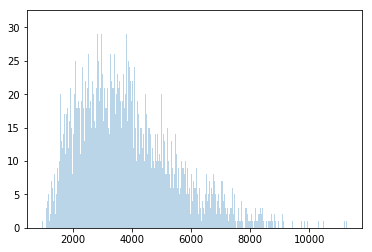

In [27]:
_,_,_=hist(rm_roi_df["Islet1"],1000,alpha=.3,label='data')

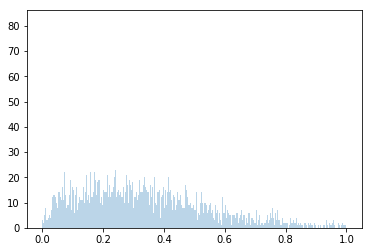

In [28]:
_,_,_=hist(rm_roi_df["norm Islet1"],1000,alpha=.3,label='data')

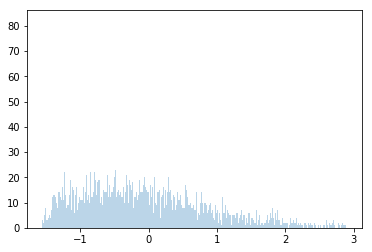

In [29]:
_,_,_=hist(rm_roi_df["z norm Islet1"],1000,alpha=.3,label='data')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A8C56D358>,
      dtype=object)

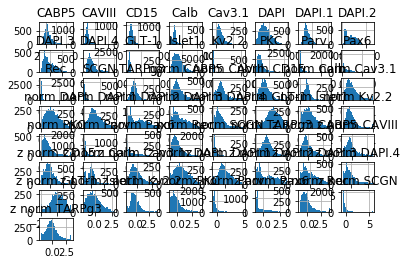

In [30]:
rm_roi_df.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A8C1C3AC8>,
      dtype=object)

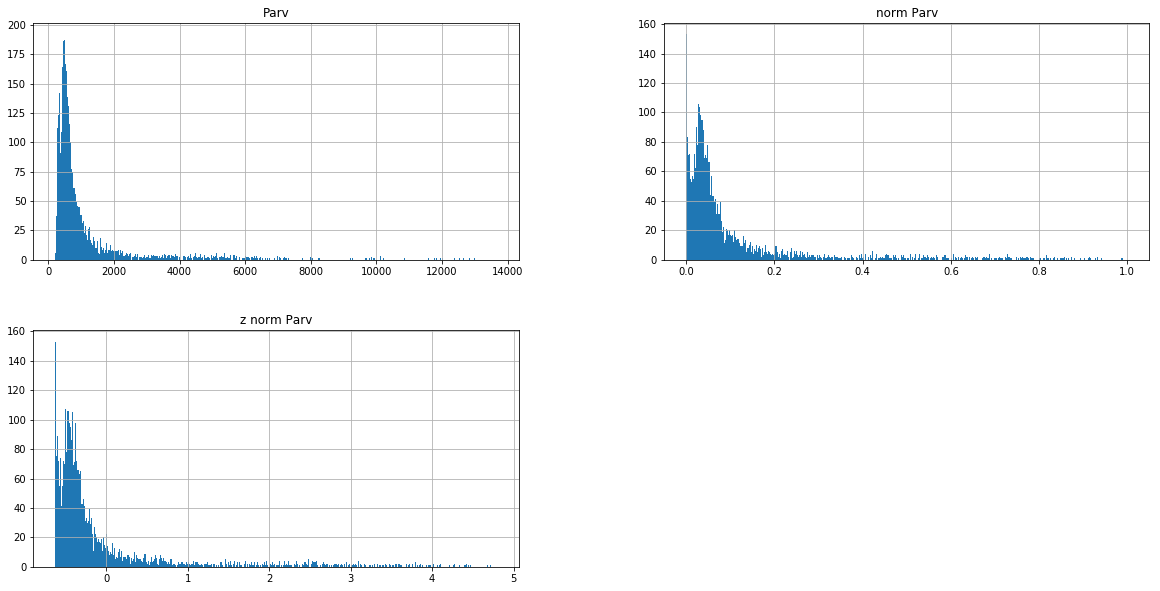

In [31]:
a = "Parv"
rm_roi_df[[a, "norm " + a, "z norm " + a]].hist(bins=1000,figsize=(20,10))

In [32]:
set([item[0:7] for item in list(rm_roi_df["ind cell"])])

{'21_s1m1',
 '21_s1m4',
 '21_s1m5',
 '21_s2m1',
 '21_s2m5',
 '23_s1m2',
 '23_s1m4',
 '23_s1m5',
 '23_s2m1',
 '23_s2m2',
 '23_s2m4',
 '23_s2m5'}

In [33]:
rm_roi_df[rm_roi_df['ind cell'].str.contains("21_s1m1")]["Pax6"].mean()

1962.2215800636272

In [34]:
#Mean of each slide slice area
slideinfo = []
selectCols = ["Pax6", "DAPI.2", "CAVIII", "Parv", "CABP5"]
for slide in set([item[0:7] for item in list(rm_roi_df["ind cell"])]):
    for col in selectCols:
        slidecol = rm_roi_df[rm_roi_df['ind cell'].str.contains(slide)][col]
        slideinfo.append([slide, col, slidecol.mean(), slidecol.std()])

In [35]:
slideinfo

[['23_s1m5', 'Pax6', 2410.0472217898823, 2148.557371308495],
 ['23_s1m5', 'DAPI.2', 2302.3900933852137, 514.6330519904441],
 ['23_s1m5', 'CAVIII', 2960.1020000000003, 1285.3312948592736],
 ['23_s1m5', 'Parv', 1649.7662178988342, 2166.195052601731],
 ['23_s1m5', 'CABP5', 3221.409657587547, 859.2997680704318],
 ['21_s1m4', 'Pax6', 2424.308417744916, 2107.655726027275],
 ['21_s1m4', 'DAPI.2', 1705.5826229205188, 384.2490503130197],
 ['21_s1m4', 'CAVIII', 2611.750689463956, 664.3787966514813],
 ['21_s1m4', 'Parv', 1375.692890942698, 1726.3311657945794],
 ['21_s1m4', 'CABP5', 2887.495929759704, 561.0963833762486],
 ['21_s2m1', 'Pax6', 1534.8870692124117, 1310.5385809125119],
 ['21_s2m1', 'DAPI.2', 1209.7386324582342, 245.6289584957553],
 ['21_s2m1', 'CAVIII', 1595.7714844868742, 203.89591136832146],
 ['21_s2m1', 'Parv', 382.75287589498777, 209.54632640814924],
 ['21_s2m1', 'CABP5', 2183.7578281622923, 311.56855245623956],
 ['23_s2m2', 'Pax6', 2726.456466005663, 2449.222810347492],
 ['23_s2m

In [36]:
#Mean STD (3/18/19)
selectMeanSTD = pd.DataFrame(slideinfo, columns=['slide', 'col', 'mean', 'std'])
selectMeanSTD

,slide,col,mean,std
0,23_s1m5,Pax6,2410.047222,2148.557371
1,23_s1m5,DAPI.2,2302.390093,514.633052
2,23_s1m5,CAVIII,2960.102000,1285.331295
3,23_s1m5,Parv,1649.766218,2166.195053
4,23_s1m5,CABP5,3221.409658,859.299768
5,21_s1m4,Pax6,2424.308418,2107.655726
6,21_s1m4,DAPI.2,1705.582623,384.249050
7,21_s1m4,CAVIII,2611.750689,664.378797
8,21_s1m4,Parv,1375.692891,1726.331166
9,21_s1m4,CABP5,2887.495930,561.096383


In [38]:
selectMeanSTD.sort_values("col")

,slide,col,mean,std
29,23_s1m4,CABP5,3281.828469,1028.811351
54,21_s1m5,CABP5,2680.247373,584.981759
49,23_s2m4,CABP5,3479.220995,1009.568270
44,23_s2m5,CABP5,3296.816522,936.643134
39,21_s1m1,CABP5,3245.650618,649.967186
34,21_s2m5,CABP5,2992.881610,687.190387
24,23_s1m2,CABP5,3467.292124,815.788254
19,23_s2m2,CABP5,3511.192101,1007.216804
14,21_s2m1,CABP5,2183.757828,311.568552
59,23_s2m1,CABP5,2359.581586,427.038559
